<h2 style = "text-align:center">Bike Sharing System</h2>
<h4 style = "text-align:left">Problem Statement:</h4>

   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

<li>Which variables are significant in predicting the demand for shared bikes.</li>
<li>How well those variables describe the bike demands.</li>

   Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

<h3 style = "text-align:left">Business Objective:</h3>

   You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

We have required data provided and data dictionary is also present. Let's have a look at the data and understand the data properly. In order to load the data and for further processing let's import the required libraries.

In [113]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

<h3 style = "text-align:left">1 - Understanding the data</h3>

In [114]:
bs_df = pd.read_csv('day.csv')

In [115]:
#Let's look at first few rows
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
#Check the shape of the data frame to understand the number of rows and columns present in the data
bs_df.shape

(730, 16)

<h4>Observation:</h4>The data set contains 730 rows and 16 columns. Let's look at the data type, also check if any incorrect or invalid data present, along with that look at the column names, data description, and values of the data.

In [117]:
#check the data type
bs_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [118]:
#check if any null or empty value present
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h4>Observation:</h4> The data seems to be clean, as the columns are not null columns, there are no null values in the data set.

In [119]:
#list the columns in the data set
bs_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [120]:
#describe the data set
bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [121]:
#list the dataframe values
bs_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

<h3 style = "text-align:left">2 - Data Cleansing</h3>

In [122]:
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
print(bs_df.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


<li>In the above details let's extract the <b>dteday</b> into date, month and year, it could useful for our analysis. The column <b>yr</b> contains only two values, as we have already extracted the year from <b>dteday</b> we can drop <b>yr</b> column.</li>
<li>In addition to this <b>mnth</b> column also can be dropped as we are going to extract <b>month</b> from <b>dteday</b></li>.
<li>Since we have already extracted date, month, and year from <b>dteday</b> we don't need this column anymore. This is also can be dropped.</li>

In [124]:
#data type of the dteday is object, so before extract the date let's format the object into date type.
bs_df['dteday'] =  pd.to_datetime(bs_df['dteday'],format='%d-%m-%Y')
bs_df['dteday'].dtype

dtype('<M8[ns]')

In [125]:
#from here extracting month and year is straigth forward

bs_df['year'] = pd.DatetimeIndex(bs_df['dteday']).year
bs_df['month'] = pd.DatetimeIndex(bs_df['dteday']).month

In [126]:
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


Data Extraction is complete, next dropping the irrelevant columns which we discussed above.

In [127]:
bs_df.drop(['yr','mnth','dteday'],axis=1,inplace=True)

In [128]:
bs_df.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [129]:
print(bs_df.nunique())

instant       730
season          4
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
year            2
month          12
dtype: int64


From the above details, we could observe that workingday column is already present, other than working day remaining are holiday, so we dont need a seperate column for <b>holiday</b>. In addition to this <b>instant</b> column is just a row identifier, so it is also can be removed.

In [130]:
#Dropping columns instant and holiday
bs_df.drop(['instant'], axis = 1, inplace = True)
bs_df.drop(['holiday'], axis = 1, inplace = True)

In [131]:
bs_df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [132]:
bs_df.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'year', 'month'],
      dtype='object')

We have left with these columns. As per the data dictionary <b>cnt</b> is the sum total of rental bikes including both casual and registered. As we have <b>cnt</b> already in place we can remove <b>casual</b> and <b>registered</b>.

In [133]:
#Dropping  casual and registered
bs_df.drop(['casual'], axis = 1, inplace = True)
bs_df.drop(['registered'], axis = 1, inplace = True)

In [134]:
#Check the data after the drops
bs_df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


Already we found that there is no null values present, let's verify that again.

In [135]:
bs_df.isnull().sum()

season        0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
year          0
month         0
dtype: int64

There are no null values. Again print the unique values of all columns.

In [136]:
print(bs_df.nunique())

season          4
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
year            2
month          12
dtype: int64


Check if any outliers present in any of the following columns <b>temp</b>, <b>atemp</b>, <b>hum</b> and <b>windspeed</b>

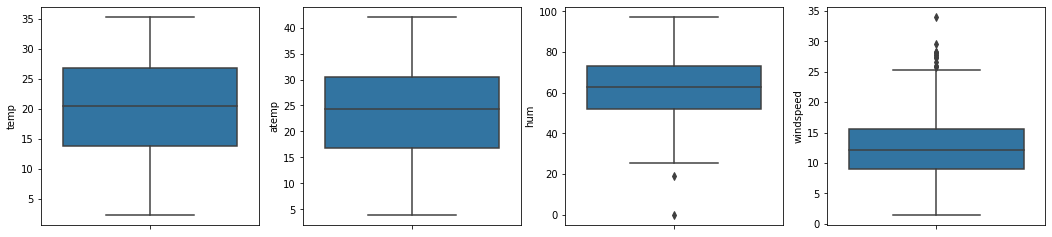

In [137]:
#Let's plot a box plot to check this for these columns
cols = ["temp", "atemp", "hum","windspeed"]
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bs_df)
    i+=1

<b>Observation:</b>From these plots, it is evident that there are no outliers present. The temp is normal, atemp is also normal, humidity also in the acceptable range, finally the windspeed also under the normal limit. So, we are good with the data set and no need to handle the outliers.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

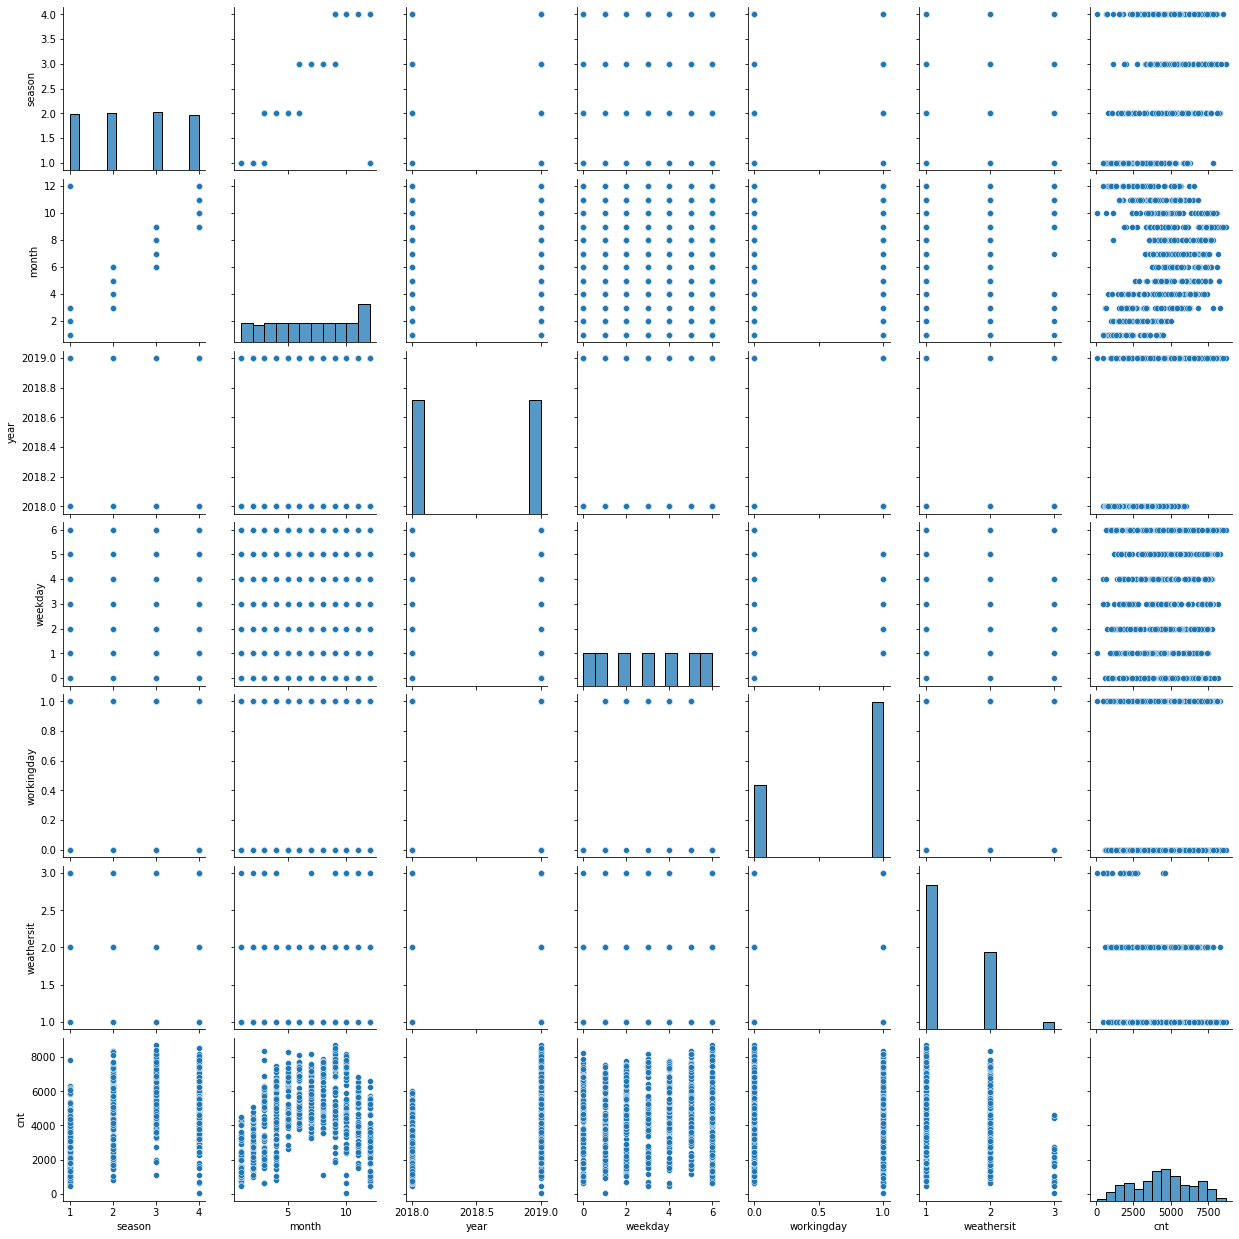

In [138]:
cols=['season','month','year','weekday','workingday','weathersit','cnt']
bs_df_pair_plt = bs_df[cols]
sns.pairplot(bs_df_pair_plt)
plt.show()

<h3 style = "text-align:left">3 - Data Analysis</h3>

Convert all applicable numeric variables into categorical variables.

In [139]:
print(bs_df.nunique())

season          4
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
year            2
month          12
dtype: int64


In the above info, season, weathersit and month are numeric, lets convert them into non-numeric category based on the info given in the data dictionary.

<b>Season</b>:1:Spring, 2:Summer, 3:Fall, 4:Winter</br>
<p><b>Weather</b>:
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</p>

In [140]:
bs_df.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)
bs_df.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)

In [141]:
bs_df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,Spring,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,Spring,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,Spring,1,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,Spring,2,1,Good,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,Spring,3,1,Good,9.305237,11.46350,43.6957,12.522300,1600,2018,1


Still, there is a scope to convert the columns <b>workingday</b>, <b>weekday</b> and <b>month</b> also into non-numeric category.

In [142]:
bs_df.month = bs_df.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',
                                  10: 'Oct',11: 'Nov',12: 'Dec'})
bs_df.weekday = bs_df.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bs_df.workingday = bs_df.weekday.replace({0: 'Holiday',1: 'Workingday'})
bs_df.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,Spring,Sat,Sat,Moderate,14.110847,18.18125,80.5833,10.749882,985,2018,Jan
1,Spring,Sun,Sun,Moderate,14.902598,17.68695,69.6087,16.652113,801,2018,Jan
2,Spring,Mon,Mon,Good,8.050924,9.47025,43.7273,16.636703,1349,2018,Jan
3,Spring,Tue,Tue,Good,8.200000,10.60610,59.0435,10.739832,1562,2018,Jan
4,Spring,Wed,Wed,Good,9.305237,11.46350,43.6957,12.522300,1600,2018,Jan


Let's draw plots for numeric values to check their correlation.

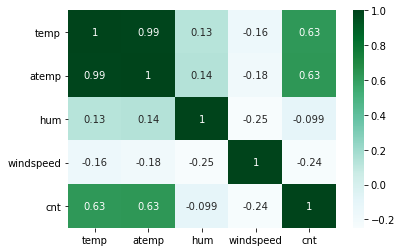

In [143]:
#Draw heatmap for continuous numeric variables relationship
sns.heatmap(bs_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

<b>Observation:</b>
From the above heat map it is observed that temp and atemp has high correlation, it is nearly 1(highly correlated). In addition to this, it looks like atemp has derived from temp. So the column <b>atemp</b> can be dropped here to avoid multicollinearity.

In [144]:
#drop atemp
bs_df.drop('atemp',axis=1,inplace=True)

In [145]:
bs_df.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,Spring,Sat,Sat,Moderate,14.110847,80.5833,10.749882,985,2018,Jan
1,Spring,Sun,Sun,Moderate,14.902598,69.6087,16.652113,801,2018,Jan
2,Spring,Mon,Mon,Good,8.050924,43.7273,16.636703,1349,2018,Jan
3,Spring,Tue,Tue,Good,8.200000,59.0435,10.739832,1562,2018,Jan
4,Spring,Wed,Wed,Good,9.305237,43.6957,12.522300,1600,2018,Jan


<h3 style = "text-align:left">4 - Categorical Variable and Target Variable Analysis</h3>

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

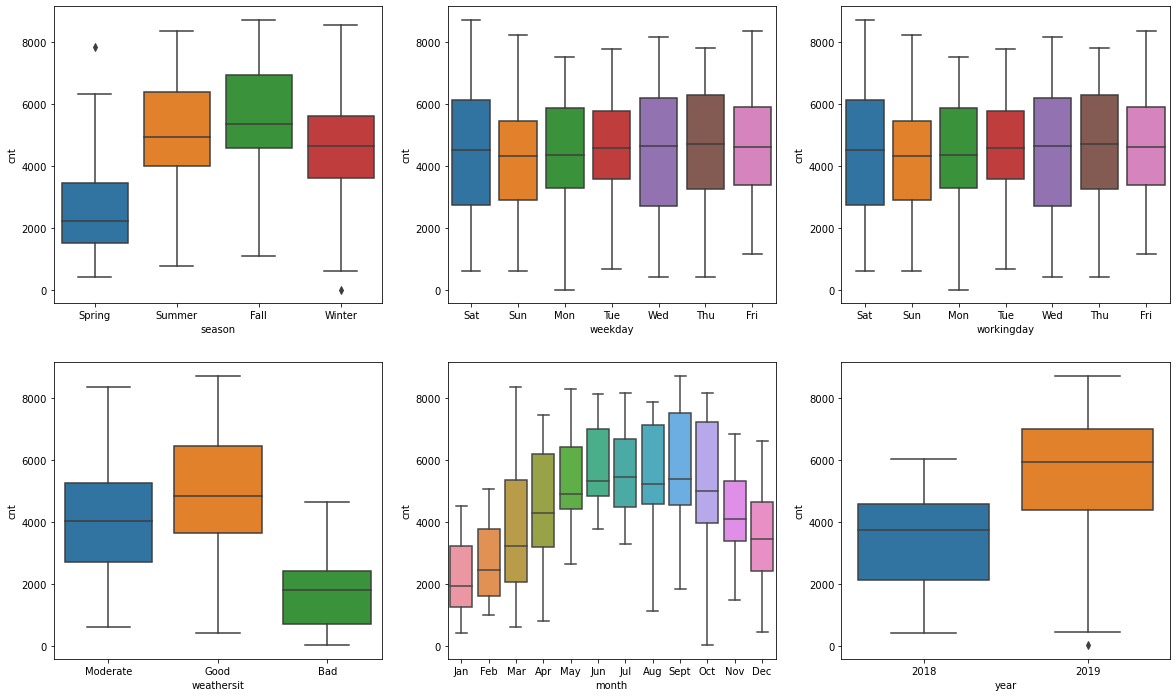

In [146]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'month', y = 'cnt', data = bs_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'year', y = 'cnt', data = bs_df)
plt.show()

<b>Observation:</b>
<li>Fall season has high demand for bikes.</li>
<li>Bike Demand has increased in 2019 when compare to 2018.</li>
<li>During year begining and ending the demand was less. It could due to the bad weather condition on those days. Demand is continuously increasing each month till June. On September month has highest demand.</li>
<li>Weekdays did not give conclusive evidence on demand.</li>
<li>On non-working days the demand is high as expected.</li>
<li>As expected during good weather days, the demand was high.</li>



<h4><u>Let's do regression plot on continous variable with cnt</u></h4>

1.<b> Cnt and Temp</b>

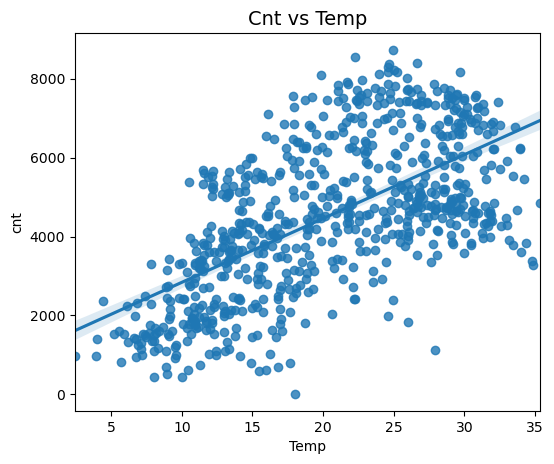

In [147]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Cnt vs Temp",fontsize=14)
sns.regplot(data=bs_df,y="cnt",x="temp")
plt.xlabel("Temp")
plt.show()

<b>Observation:</b>
<li>Demand for bikes is positively correlated with <b>temp</b>. We can observe that the <b>cnt</b> has linearly increasing with 
<b>temp</b> it indicates the linear relationship.</li>

2<b> Cnt and Windspeed</b>

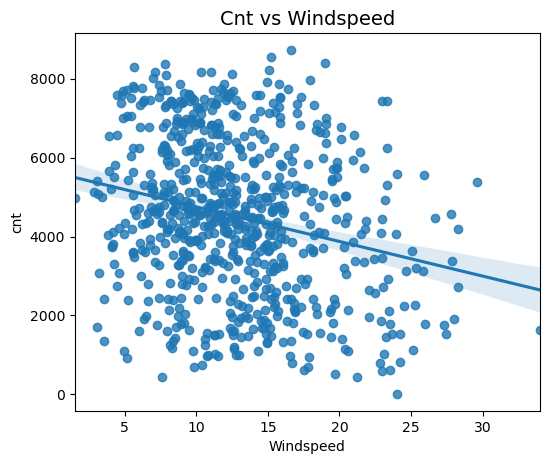

In [148]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Cnt vs Windspeed",fontsize=14)
sns.regplot(data=bs_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

<b>Observation:</b>
    <li>There is no linear relationship with wind. However demand for bikes has decreased with increase in windspeed.</li>


3<b> Cnt and Humidity</b>

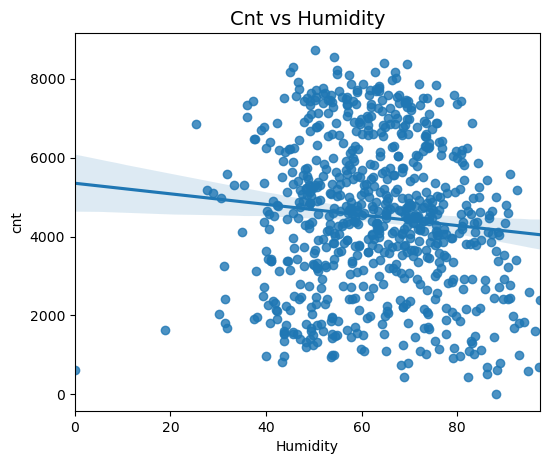

In [149]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Cnt vs Humidity",fontsize=14)
sns.regplot(data=bs_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

<b>Observation:</b>
    <li>In this combination also there is no linear relationship with hum. So we cannot predict the trend here.</li>

<h3 style = "text-align:left">4 - Data Preparation for Linear Regression</h3>

Create dummy variables for all categorical variables.

In [150]:
bs_df = pd.get_dummies(data=bs_df,columns=["season","weekday","month","year"], drop_first=True)
bs_df = pd.get_dummies(data=bs_df,columns=["weathersit"])

In [151]:
bs_df.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_Spring',
       'season_Summer', 'season_Winter', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'year_2019', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [152]:
bs_df.head()

,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,year_2019,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,Sat,14.110847,80.5833,10.749882,985,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Sun,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Mon,8.050924,43.7273,16.636703,1349,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Tue,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Wed,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Before model building we have 29 columns for analysis.

<h3 style = "text-align:left">5 - Model Building</h3>


1) Segregate Training and test data.

In [153]:
bs_df.shape

(730, 29)

In [154]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bs_df, train_size = 0.7, test_size = 0.3, random_state = 100)

2) Feature Scaling continuous variables.
<li>Min-Max scaling</li>
<li>Standardisation (mean-0, sigma-1)</li>

To make all features in same scale to interpret easily. Following columns are continous to be scaled temp,hum,windspeed.

In [155]:
# Import required LR libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [156]:
# Apply MinMaxScaler() to all the columns except the 'dummy' variables.
num_vars = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [157]:
df_train.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,year_2019,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.150980,0.154902,0.143137,...,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.507843,0.029412,0.627451,0.343137
std,0.225844,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.358381,0.362166,0.350557,...,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.500429,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
df_train.head()

,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,year_2019,weathersit_Bad,weathersit_Good,weathersit_Moderate
653,Tue,0.509887,0.575354,0.300794,7534,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
576,Tue,0.815169,0.725633,0.264686,7216,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,Sat,0.442393,0.640189,0.255342,4066,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
728,Sun,0.245101,0.498067,0.663106,1796,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
482,Sat,0.395666,0.504508,0.188475,4220,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### Let's check the correlation coefficients to see which variables are highly correlated

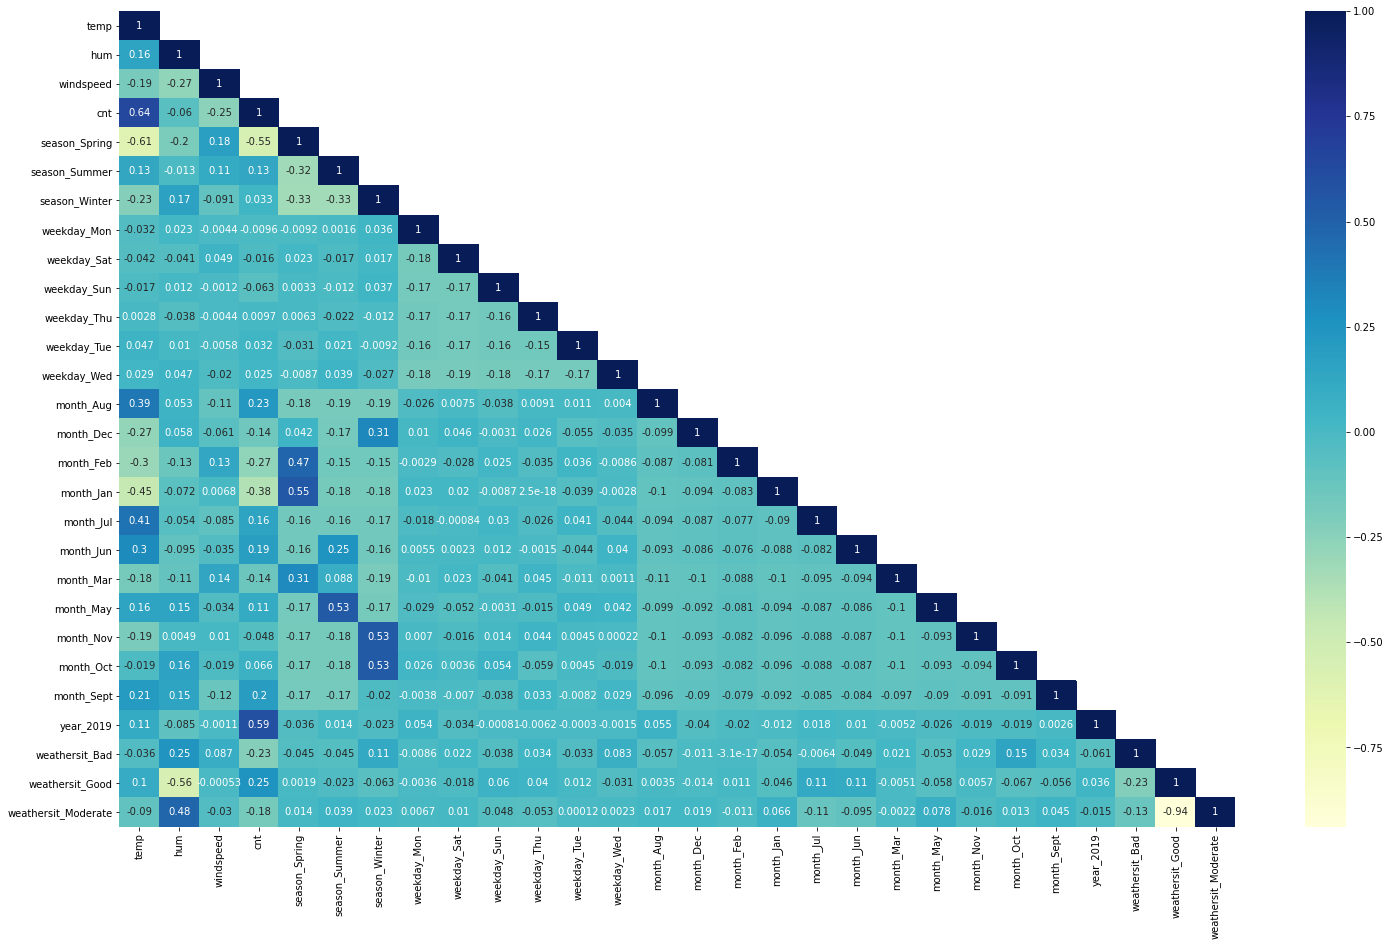

In [159]:
mask=np.array(df_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

In [160]:
y_train = df_train.pop('cnt')
X_train = df_train

In [161]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(df_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [162]:
# Check the parameters obtained
lr.params

const    1497.882426
temp     5562.458744
dtype: float64

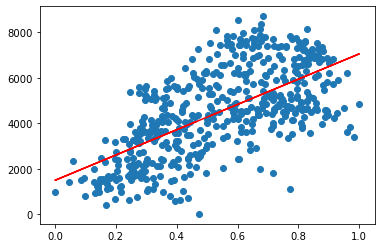

In [163]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1],  1497.882426 + 5562.458744*X_train_lm.iloc[:, 1], 'r')
plt.show()

<h5>Model 1</h5>

In [164]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           5.80e-61
Time:                        00:30:08   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `weathersit_Good`.
<h5>Model 2</h5>

In [165]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weathersit_Good']]

In [166]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const              1109.571759
temp               5397.754289
weathersit_Good     759.900283
dtype: float64

In [167]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.16e-66
Time:                        00:30:19   Log-Likelihood:                -4435.2
No. Observations:                 510   AIC:                             8876.
Df Residuals:                     507   BIC:                             8889.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1109.5718    179.508     

We have slightly improved the model as the value of adjusted R-squared as its value has increased to `0.449` from `0.413`.
Let's go ahead and add few another variable, `season_Summer`,  `season_Winter`.

<h5>Model 3</h5>

In [168]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weathersit_Good','season_Summer','season_Winter']]

In [169]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               466.642491
temp               5732.177324
weathersit_Good     818.668384
season_Summer       617.076698
season_Winter      1104.884701
dtype: float64

In [170]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     128.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.58e-75
Time:                        00:30:22   Log-Likelihood:                -4408.4
No. Observations:                 510   AIC:                             8827.
Df Residuals:                     505   BIC:                             8848.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             466.6425    191.161     

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

Let's add few more variables called `weekday_Tue`,  `weekday_Wed`, and  `weekday_Thu`

<h5>Model 4</h5>

In [171]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weathersit_Good','season_Summer','season_Winter', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu']]

In [172]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               447.260886
temp               5728.192759
weathersit_Good     819.353970
season_Summer       615.876496
season_Winter      1106.469504
weekday_Tue          10.903248
weekday_Wed          81.113044
weekday_Thu          50.074969
dtype: float64

In [173]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     72.97
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           1.73e-72
Time:                        00:30:25   Log-Likelihood:                -4408.3
No. Observations:                 510   AIC:                             8833.
Df Residuals:                     502   BIC:                             8866.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             447.2609    196.974     

<h5>Model 5</h5>
Let's add year_2019 also as an another variable.

In [174]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weathersit_Good','season_Summer','season_Winter', 'weekday_Tue',
                      'weekday_Wed', 'weekday_Thu','year_2019']]

In [175]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const              -303.157247
temp               5249.308451
weathersit_Good     763.807176
season_Summer       609.251922
season_Winter      1096.336739
weekday_Tue          35.668542
weekday_Wed         100.053141
weekday_Thu          79.463175
year_2019          2041.032688
dtype: float64

In [176]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.13e-157
Time:                        00:30:29   Log-Likelihood:                -4207.2
No. Observations:                 510   AIC:                             8432.
Df Residuals:                     501   BIC:                             8471.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -303.1572    136.406     

<h5>Model 6</h5>
Let's add all months related variables. 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept'

In [177]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weathersit_Good','season_Summer','season_Winter', 'weekday_Tue',
                      'weekday_Wed', 'weekday_Thu','year_2019','month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept']]

In [178]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               455.455357
temp               3677.829369
weathersit_Good     837.892528
season_Summer       540.150489
season_Winter      1341.667136
weekday_Tue          48.159367
weekday_Wed          79.945831
weekday_Thu          65.103806
year_2019          2070.204597
month_Aug           643.523678
month_Dec          -502.429391
month_Feb          -540.639352
month_Jan          -627.245023
month_Jul           105.133414
month_Jun           316.337649
month_Mar           -85.680950
month_May           371.922042
month_Nov          -618.594972
month_Oct          -267.190080
month_Sept          963.645116
dtype: float64

In [179]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.87e-157
Time:                        00:30:32   Log-Likelihood:                -4178.3
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     490   BIC:                             8481.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             455.4554    343.129     

If we look at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [180]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train.dtypes

workingday              object
temp                   float64
hum                    float64
windspeed              float64
season_Spring            uint8
season_Summer            uint8
season_Winter            uint8
weekday_Mon              uint8
weekday_Sat              uint8
weekday_Sun              uint8
weekday_Thu              uint8
weekday_Tue              uint8
weekday_Wed              uint8
month_Aug                uint8
month_Dec                uint8
month_Feb                uint8
month_Jan                uint8
month_Jul                uint8
month_Jun                uint8
month_Mar                uint8
month_May                uint8
month_Nov                uint8
month_Oct                uint8
month_Sept               uint8
year_2019                uint8
weathersit_Bad           uint8
weathersit_Good          uint8
weathersit_Moderate      uint8
dtype: object

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,75.41
17,month_Nov,6.61
1,temp,6.44
18,month_Oct,6.44
4,season_Winter,5.96
10,month_Dec,5.42
9,month_Aug,5.02
12,month_Jan,5.00
3,season_Summer,4.69
13,month_Jul,4.57


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `month_Nov` has a significantly high VIF (`6.61`) . Hence, this kind of variables isn't of much use and should be dropped.
month_Nov, month_Oct, season_Winter, month_Dec

<h5>Updating Model 6</h5>

In [182]:
X_train = X_train.drop('month_Nov', 1)
X_train= X_train.drop('month_Oct', 1)
X_train= X_train.drop('season_Winter', 1)
X_train= X_train.drop('month_Dec', 1)


In [183]:
X_train= X_train.drop('workingday', 1)

In [184]:
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.34e-179
Time:                        00:30:40   Log-Likelihood:                -4117.8
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     487   BIC:                             8379.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1938.0951    

### Again check the VIF.

In [185]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weathersit_Moderate,inf
22,weathersit_Good,inf
21,weathersit_Bad,inf
1,temp,5.59
4,season_Spring,5.06
14,month_Jan,3.03
15,month_Jul,2.65
12,month_Aug,2.55
13,month_Feb,2.43
5,season_Summer,2.37


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

<b>Observation:</b>
<li>Now p-value is less than 0.05</li>
<li>VIF values are also in the acceptable limit.</li>
<li>It has all important statistics high (R-square, Adjusted R-squared and F-statistic)</li>
<li>There is no insignificant variables and no multicolinear (high VIF) variables</li>
<li>Difference between R-squared and Adjusted R-squared values for this model is veryless, it is only 0.010</li>

So, this is the final model that can be taken for our analysis.

<h3 style = "text-align:left">6 - Model Evaluation and Prediction</h3>
<h4 style = "text-align:left">1 - Residual Analysis</h4>
Let's check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [186]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

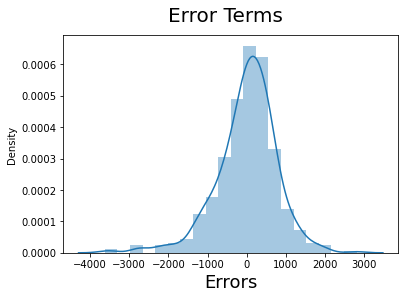

In [187]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<h3 style = "text-align:left">7 - Evaluation Using the Final Model</h3>

In [188]:
num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [189]:
df_test.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,year_2019,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,0.127854,0.118721,0.146119,...,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.479452,0.027397,0.652968,0.319635
std,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,0.334692,0.324202,0.354034,...,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.500722,0.163612,0.477117,0.467403
min,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Actual and Predicated are following same pattern so it seems ok.

#### Dividing into X_test and y_test

In [190]:
y_test = df_test.pop('cnt')
X_test = df_test

In [191]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [192]:
X_test_m4 = X_test_m4.drop(["workingday","month_Dec","month_Nov","season_Winter","month_Oct"], axis = 1)

In [193]:
y_pred_m4 = lr_4.predict(X_test_m4)

<h3 style = "text-align:left">7 - Making Predictions</h3>
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

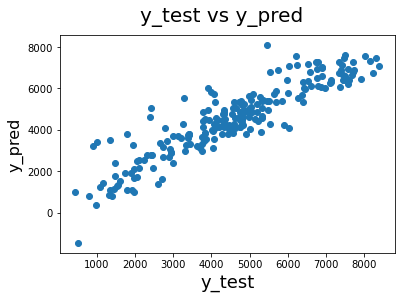

In [194]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

<b><u>Final R-squared score:</u></b>

In [195]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.8197233045913005

<h3 style = "text-align:left">8 - Conclusion</h3>

Following suggestions recommended for the company.

<li>Holiday is one of the important factor for bike demand.</li>
<li>Season has impact on bike demand, company should plan for ads and offers during spring season.</li>
<li>Weather impacts bike demand, company should make more bikes available when it is good.</li>
<li>Company should reduce/cut investment during year starting and ending, because during these months due to extreme weather condition demand for bike decreases.</li>
<li>When compared to 2018, bike usuage was high in 2019, so the same trend might continue in the susequent years.</li>